In [ ]:
//@version=5
indicator("vertical lines", overlay=true)

// Only show vertical lines if timeframe is intraday (less than daily)
showLines = timeframe.isintraday

// Convert current bar time to Asia/Manila timezone
t = time(timeframe.period, "Asia/Manila")

// Target hours excluding 0, 12, 20
var int[] targetHours = array.from(3, 6, 8, 15, 24) // 24 means midnight (0h)

// Special hours separated
specialHour20 = 20
specialHour0 = 0  // midnight
specialHour12 = 12  // noon

// Function to check if current bar time matches any target hour exactly at minute zero
isTargetTime() =>
    h = hour(t)
    m = minute(t)
    match = false
    for i = 0 to array.size(targetHours) - 1
        if (h == array.get(targetHours, i) or (h == 0 and array.get(targetHours, i) == 24)) and m == 0
            match := true
    match

// Check if current time matches special hour 20 at minute zero
isSpecialTime20() =>
    h = hour(t)
    m = minute(t)
    (h == specialHour20) and (m == 0)

// Check if current time matches special hour 0 at minute zero
isSpecialTime0() =>
    h = hour(t)
    m = minute(t)
    (h == specialHour0) and (m == 0)

// Check if current time matches special hour 12 at minute zero
isSpecialTime12() =>
    h = hour(t)
    m = minute(t)
    (h == specialHour12) and (m == 0)

// Detect new day (day break)
newDay = ta.change(time("D"))

// Only draw lines if timeframe is intraday
if showLines
    // Draw vertical line at day break (red, width 1)
    if newDay
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color=color.green, width=1, extend=extend.both)

    // Draw vertical line at target times (blue, width 1)
    if isTargetTime()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color=color.rgb(33, 149, 243, 90), width=1, extend=extend.both)

    // Draw vertical line at special hour 20 (violet, width 1)
    if isSpecialTime20()
        line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color=color.new(color.teal, 0), width=1, extend=extend.both)

    // Draw vertical line at special hour 0 (midnight) - orange, width 2, dotted
    if isSpecialTime0()
        var line midnightLine = na
        midnightLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color=color.orange, width=1, extend=extend.both)
        line.set_style(midnightLine, line.style_dotted)

    // Draw vertical line at special hour 12 (noon) - green, width 2, dotted 
    if isSpecialTime12()
        var line noonLine = na
        noonLine := line.new(bar_index, low - 10 * syminfo.mintick, bar_index, high + 10 * syminfo.mintick, color=color.red, width=1, extend=extend.both)
        line.set_style(noonLine, line.style_dotted)


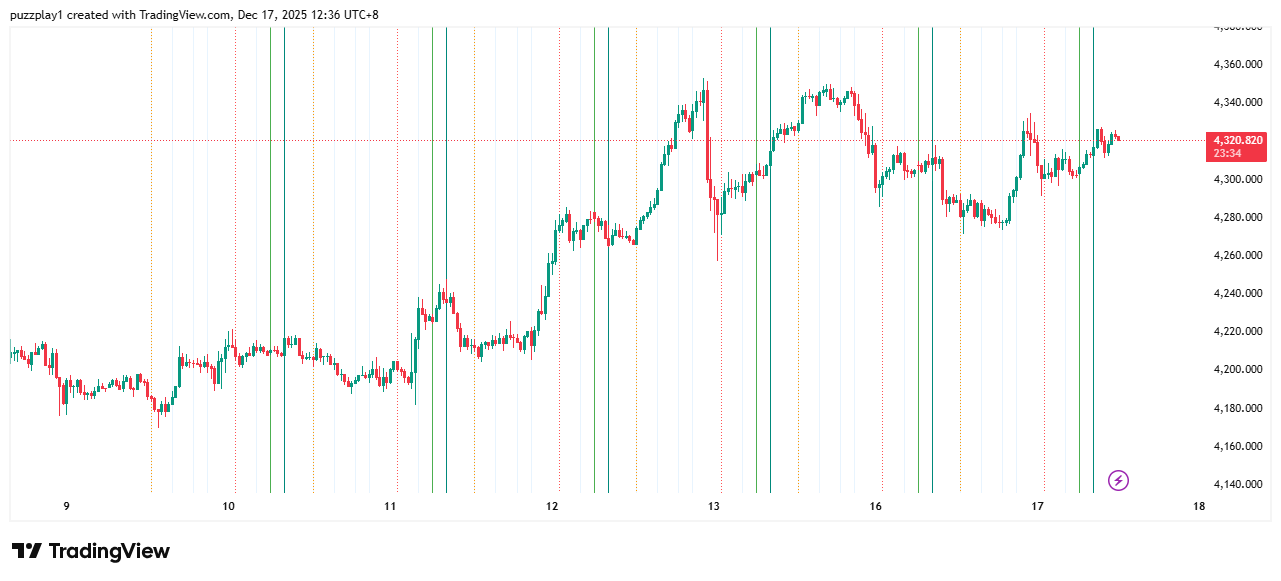